## Are you ready for a zombie apocalypse? 


In this project, our objective is to employ logistic regression to predict the zombie status of individuals and calculate the probability of a person becoming a zombie, based on their given status.

The dataset contains information related to zombie encounters and factors that may influence an individual's susceptibility to becoming a zombie. You can find it at : https://www.kaggle.com/datasets/kingabzpro/zombies-apocalypse

1.zombieid: A unique identifier for each individual in the dataset.

2.zombie: A binary variable indicating the zombie status of the individual, where 1 represents a zombie and 0 represents a non-zombie.

3.age: The age of the individual, which may be a key factor in determining their vulnerability to becoming a zombie.

4.sex: The gender of the individual, which can provide insights into potential gender-related differences in susceptibility.

5.rurality: A categorical variable describing the location of the individual, categorized as rural, suburban, or urban. This can indicate the impact of the living environment on zombie status.

6.household: The size of the individual's household, which might influence their access to resources and safety.

7.water: Information about the availability of water supplies, which is crucial for survival in a post-apocalyptic world.

8.food: Data on the availability of food resources, another vital element for survival.

9.medication: Information about access to medication or medical supplies, which can impact an individual's health and resilience.

10.tools: Data related to the availability of tools or equipment, which may be important for defense and fortification.

### 1. Loading our libaries & summarizing our data

It is essential to create a new variable " water person " which shows the estimated amount of water available per person within each household in the dataset. It represents the water supply per capita or per individual in a household.

In [422]:
library(lme4)
library(ggplot2)
library(gridExtra)
library(odds.n.ends)
library(car)

zombies <- read.csv("datasets/zombies.csv")
summary(zombies)

# Create water-per-person
zombies$water.person <- zombies$water / zombies$household
# Examine the new variable 
summary(zombies$water.person)

    zombieid         zombie         age            sex          rurality 
 Min.   :  1.00   Human :121   Min.   :18.00   Female: 99   Rural   :98  
 1st Qu.: 50.75   Zombie: 79   1st Qu.:29.00   Male  :101   Suburban:48  
 Median :100.50                Median :42.00                Urban   :54  
 Mean   :100.50                Mean   :44.41                             
 3rd Qu.:150.25                3rd Qu.:58.00                             
 Max.   :200.00                Max.   :85.00                             
   household        water            food             medication 
 Min.   :1.00   Min.   : 0.00   Food   :110   Medication   : 94  
 1st Qu.:2.00   1st Qu.: 0.00   No food: 90   No medication:106  
 Median :2.50   Median : 8.00                                    
 Mean   :2.68   Mean   : 8.75                                    
 3rd Qu.:4.00   3rd Qu.: 8.00                                    
 Max.   :6.00   Max.   :40.00                                    
      tools         

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   3.092   5.333  13.333 

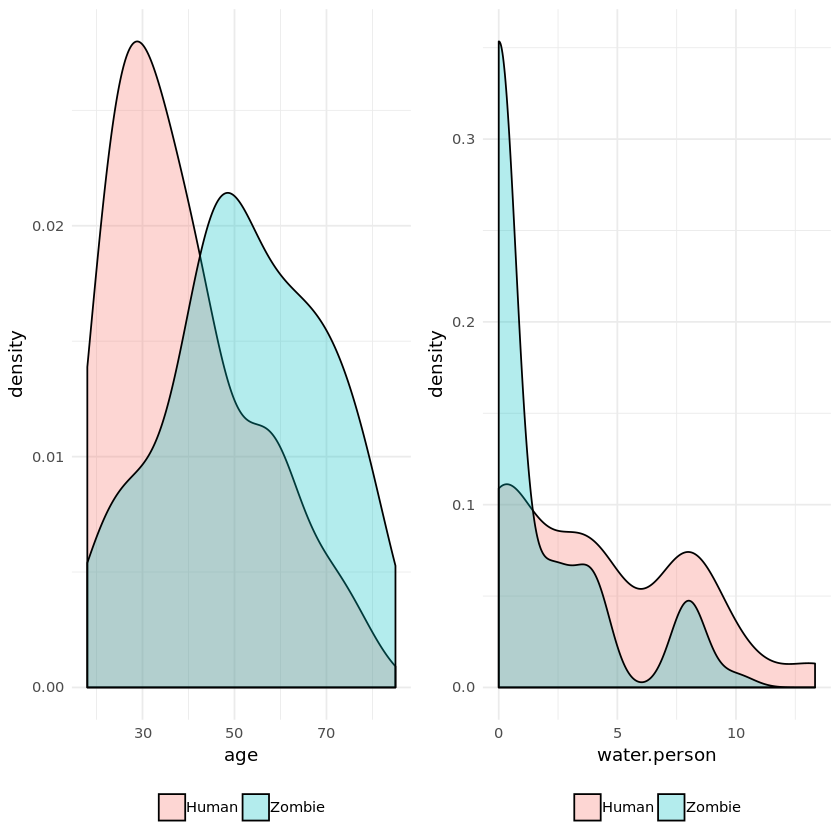

In [424]:
ageZombies <- ggplot(data = zombies, aes(x = age, fill = zombie)) +
  geom_density(alpha = 0.3) +  
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank())

waterPersonZom <- ggplot(data = zombies, aes(x = water.person, fill = zombie)) +
  geom_density(alpha = 0.3) +  
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank())

grid.arrange(ageZombies, waterPersonZom, ncol = 2)

Interpreting the above visuals we can claim that people with less than one gallons of water (right visual) turned into zombies, while househols with more than 4 gallons water survived. Also, it looks like those who turned into zombies were older (left visual) and had less available clean water. This suggests that getting water to the remaining humans might help protect them from the zombie hoards!

### 3. Compare zombies and humans

There are several quetions that need to be answered such as : What are the other characteristics and supplies that differ between humans and zombies?

Do zombies live in urban areas? Or are they more common in rural areas?

Is water critical to staying human?

Is food critical to staying human?

In [426]:
zombies.factors <- zombies[ , sapply(zombies, is.factor)]

# This function gets the percent of every variable for zombies variable
perc.zombies <- lapply(zombies.factors, 
                       function(x){ 
                           return(prop.table(table(x, zombies$zombie),
                                             margin = 1))
                           })
perc.zombies

$zombie
        
x        Human Zombie
  Human      1      0
  Zombie     0      1

$sex
        
x            Human    Zombie
  Female 0.6262626 0.3737374
  Male   0.5841584 0.4158416

$rurality
          
x              Human    Zombie
  Rural    0.8163265 0.1836735
  Suburban 0.5208333 0.4791667
  Urban    0.2962963 0.7037037

$food
         
x             Human    Zombie
  Food    0.8272727 0.1727273
  No food 0.3333333 0.6666667

$medication
               
x                   Human    Zombie
  Medication    0.8297872 0.1702128
  No medication 0.4056604 0.5943396

$tools
          
x              Human    Zombie
  No tools 0.6039604 0.3960396
  tools    0.6060606 0.3939394

$firstaid
                       
x                           Human    Zombie
  First aid supplies    0.6320755 0.3679245
  No first aid supplies 0.5744681 0.4255319

$sanitation
               
x                   Human    Zombie
  No sanitation 0.4705882 0.5294118
  Sanitation    0.7448980 0.2551020

$clothin

### 4. Recode variables missing values

The clothing and documents variables have only one category in prop.table(). We have been provided with the information that the NA values are refered to no-clothing and no-documents. To make sure the analyses are consistent and useful, we should replace the NA values to No clothing and No documents.

In [428]:
# Add new level and recode NA to "No clothing"
levels(zombies$clothing) <- c(levels(zombies$clothing), "No clothing")
zombies$clothing[is.na(zombies$clothing)] <- "No clothing"

# Add new level and recode NA to "No documents"
levels(zombies$documents) <- c(levels(zombies$documents), "No documents")
zombies$documents[is.na(zombies$documents)] <- "No documents"

summary(zombies)

    zombieid         zombie         age            sex          rurality 
 Min.   :  1.00   Human :121   Min.   :18.00   Female: 99   Rural   :98  
 1st Qu.: 50.75   Zombie: 79   1st Qu.:29.00   Male  :101   Suburban:48  
 Median :100.50                Median :42.00                Urban   :54  
 Mean   :100.50                Mean   :44.41                             
 3rd Qu.:150.25                3rd Qu.:58.00                             
 Max.   :200.00                Max.   :85.00                             
   household        water            food             medication 
 Min.   :1.00   Min.   : 0.00   Food   :110   Medication   : 94  
 1st Qu.:2.00   1st Qu.: 0.00   No food: 90   No medication:106  
 Median :2.50   Median : 8.00                                    
 Mean   :2.68   Mean   : 8.75                                    
 3rd Qu.:4.00   3rd Qu.: 8.00                                    
 Max.   :6.00   Max.   :40.00                                    
      tools         

### 5. Selecting variables to predict zombie status
<p>From Task 3, it appears that 70.4% of people in urban areas are zombies, while just 18.4% of those in rural areas are zombies. Getting humans out of cities and protecting those who cannot leave seems important!  </p>
<p>For most of the supplies, there is less of a difference between humans and zombies, so it is difficult to decide what else to do. So we will conduct bivariate statistical tests to gain a better understanding of which differences in percents are statistically significantly associated with being a human or a zombie. </p>

In statistical hypothesis testing, the p-value (short for "probability value") is a measure that helps us assess the evidence against a null hypothesis. The null hypothesis is a statement of no effect or no association, and the p-value tells you how likely it is to observe the data you have (or something more extreme) if the null hypothesis were true.

In the context of the Chi-squared tests, the p-value indicates the probability of obtaining the observed results (or more extreme results) if there were no actual association or effect between the variables being tested. The smaller the p-value, the stronger the evidence against the null hypothesis. Typically, a small p-value (often below a significance level, like 0.05) suggests that us that we should reject the null hypothesis in favor of the alternative hypothesis, indicating a significant association or effect.

In [430]:
zombies.factors <- zombies[ , sapply(zombies, is.factor)]

# Chi-squared for factors
chi.zombies <- lapply(zombies.factors, 
                       function(x){
                           return(chisq.test(x, zombies.factors$zombie))
                           })

# T-tests for numeric
ttest.age <- t.test(zombies$age ~ zombies$zombie)
ttest.water <- t.test(zombies$water.person ~ zombies$zombie)    

chi.zombies 
ttest.age 
ttest.water

$zombie

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 195.84, df = 1, p-value < 2.2e-16


$sex

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 0.21561, df = 1, p-value = 0.6424


$rurality

	Pearson's Chi-squared test

data:  x and zombies.factors$zombie
X-squared = 41.271, df = 2, p-value = 1.092e-09


$food

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 48.49, df = 1, p-value = 3.32e-12


$medication

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 35.747, df = 1, p-value = 2.247e-09


$tools

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 0, df = 1, p-value = 1


$firstaid

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zo


	Welch Two Sample t-test

data:  zombies$age by zombies$zombie
t = -5.6247, df = 155.02, p-value = 8.453e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.099289  -8.690751
sample estimates:
 mean in group Human mean in group Zombie 
            39.12397             52.51899 



	Welch Two Sample t-test

data:  zombies$water.person by zombies$zombie
t = 5.5436, df = 197.43, p-value = 9.415e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.636281 3.443253
sample estimates:
 mean in group Human mean in group Zombie 
            4.095041             1.555274 



To determine which variables have a statistically significant association with the zombie variable, you should primarily focus on the p-values from the Chi-squared tests. Lower p-values indicate stronger statistical significance. Based on the results you provided:

The variables with a high level of statistical significance (low p-values) in their association with the zombie variable are:

$zombie: Extremely significant (p-value < 2.2e-16)

$rurality: Highly significant (p-value = 1.092e-09)

$food: Highly significant (p-value = 3.32e-12)

$medication: Highly significant (p-value = 2.247e-09)

$sanitation: Highly significant (p-value = 0.0001322)
_________________________________________________________________________________________________
The variables with no statistically significant association (higher p-values) with the zombie variable are:

$sex: Not significant (p-value = 0.6424)

$tools: Not significant (p-value = 1)

$firstaid: Not significant (p-value = 0.4922)

$clothing: Not significant (p-value = 0.6042)

$documents: Not significant (p-value = 0.2721)

In summary, the variables rurality, food, medication, and sanitation have a strong statistical association with being a zombie. The zombie variable itself is also highly significant, indicating a strong relationship with other factors in the dataset. Conversely, the variables sex, tools, firstaid, clothing, and documents do not show significant associations with being a zombie.

### 6. Build the model
<p>Knowing that rurality, food, medication, sanitation, age, and water per person have statistically significant relationships to zombie status. We use this information to coordinate the delivery of food and medication while we continue to examine the data!  </p>
<p>The next step is to estimate a logistic regression model with <code>zombie</code> as the outcome to predicting zombie status.

In [432]:
zombie.model <- glm(zombie ~ age + water.person + food + rurality + medication + sanitation,
                   data = zombies, family = binomial(logit))

zombie.model.fit <- odds.n.ends(zombie.model)

print(zombie.model.fit)

Waiting for profiling to be done...


$`Logistic regression model significance`
Chi-squared        d.f.           p 
    145.596       7.000       0.000 

$`Contingency tables (model fit): percent predicted`
                 Percent observed
Percent predicted     1     0   Sum
              1   0.315 0.060 0.375
              0   0.080 0.545 0.625
              Sum 0.395 0.605 1.000

$`Contingency tables (model fit): frequency predicted`
                Number observed
Number predicted   1   0 Sum
             1    63  12  75
             0    16 109 125
             Sum  79 121 200

$`Predictor odds ratios and 95% CI`
                                 OR        2.5 %      97.5 %
(Intercept)              0.00224594 0.0002093871  0.01622961
age                      1.08005714 1.0485596858  1.11810998
water.person             0.78377398 0.6600894297  0.91287014
foodNo food              9.02618095 3.4071657576 26.70797145
ruralitySuburban         3.69686205 1.2545823697 11.59438611
ruralityUrban           14.55818400 4.5481528

## 7. Checking model assumptions
<p>The model is statistically significant (<font face="Symbol">c</font><sup>2</sup> = 145.6; p &lt; 0.05), indicating that the variables in the model work together to help explain zombie status. Older age, having no food, living in suburban or urban areas (compared to rural), and having no access to medication increased the odds of being a zombie. Access to sanitation and having enough water decreased the odds of being a zombie. The model correctly predicted the zombie status of 63 zombies and 109 humans, or 172 of the 200 participants. Before relying on the model, we check model assumptions: no multicollinearity and linearity.</p>
<p>Checking multicollinearity:<br>
We can use the generalized variance inflation factor (GVIF) to check for multicollinearity. The GVIF determines to what extent each independent variable can be explained by the rest of the independent variables. When an independent variable is well-explained by the other independent variables, the GVIF is high, indicating that the variable is redundant and should be dropped from the model. Values greater than two are often used to indicate a failed multicollinearity assumption.</p>
<p><br>
<center>
GVIF<sup>(1/(2df))</sup> < 2
<br>
df = degrees of freedom
</center>
<br></p>
<p>Checking linearity:<br>
Linearity can be checked by graphing the log-odds of the outcome against each numeric predictor to see if the relationship is linear.</p>
<p><br>

,GVIF,Df,GVIF^(1/(2*Df))
age,1.508748,1,1.228311
water.person,1.188868,1,1.090352
food,1.304250,1,1.142038
rurality,1.313980,2,1.070649
medication,1.271348,1,1.127541
sanitation,1.102351,1,1.049929


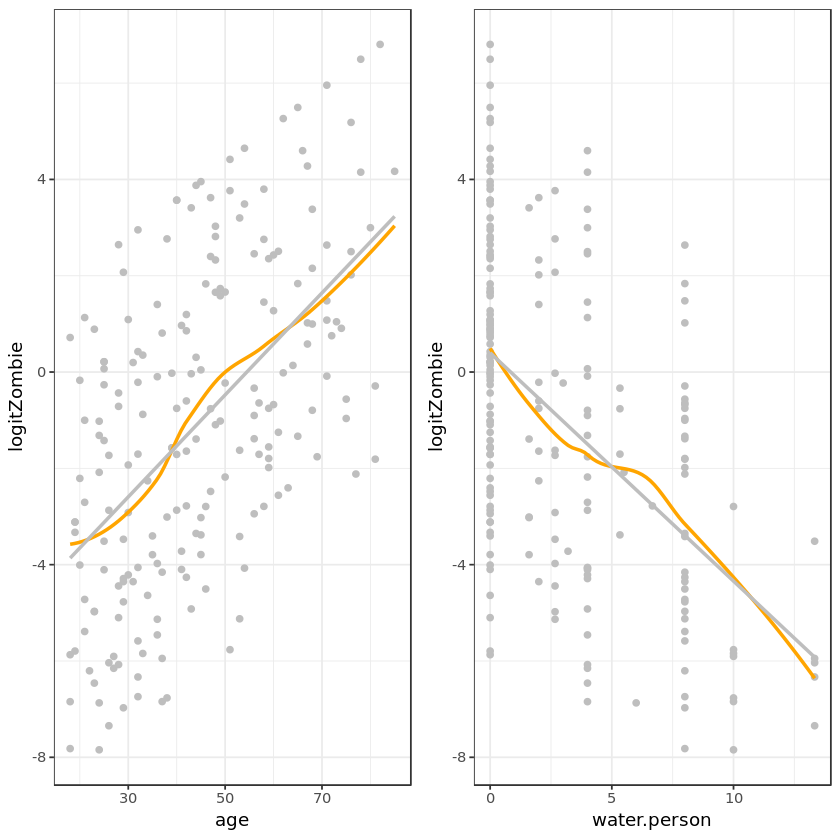

In [435]:
# Compute GVIF 
vif(zombie.model)

# Make a variable of the logit of the outcome
zombies$logitZombie <- log(zombie.model$fitted.values/(1-zombie.model$fitted.values))

ageLinearity <- ggplot(data = zombies, aes(x = age, y = logitZombie))+
  geom_point(color = "gray") +
  geom_smooth(method = "loess", se = FALSE, color = "orange") + 
  geom_smooth(method = "lm", se = FALSE, color = "gray") + 
  theme_bw() 

waterPersonLin <- ggplot(data = zombies, aes(x = water.person, y = logitZombie))+
  geom_point(color = "gray") +
  geom_smooth(method = "loess", se = FALSE, color = "orange") + 
  geom_smooth(method = "lm", se = FALSE, color = "gray") + 
  theme_bw() 


grid.arrange(ageLinearity, waterPersonLin, ncol = 2)

There is a positive linearity in age and logitZombie variable, which means that higher aged people have more probabilities to become zombies.

There is a negative linear relationship between the amount of water per person and the log-odds of becoming a zombie, indicating that as water per person increases, the probability of becoming a zombie decreases.

GVIF: This column represents the Generalized Variance Inflation Factor, which is a measure of how much the variance of the estimated coefficients in a multiple regression model is increased due to multicollinearity.

Df: This column indicates the degrees of freedom associated with each predictor variable.

GVIF^(1/(2*Df)): This column represents the square root of the GVIF raised to the power of 1 divided by twice the degrees of freedom. This transformed value is used to assess the impact of multicollinearity on the variance of coefficient estimates.

lower GVIF values and GVIF^(1/(2*Df)) values closer to 1 indicate lower levels of multicollinearity. Higher GVIF values, especially when combined with higher degrees of freedom, may suggest more significant multicollinearity among predictor variables. In your dataset, water.person and sanitation appear to have relatively low multicollinearity, while rurality shows a bit more multicollinearity. The other variables have moderate levels of multicollinearity.

### 8. Interpreting assumptions and making predictions
<p>We find that the GVIF scores are low, indicating the model meets the assumption of no perfect multicollinearity. The plots show relatively minor deviation from the linearity assumption for <code>age</code> and <code>water.person</code>. The assumptions appear to be sufficiently met. </p>

We can now use the model to predict new data. 

<p>One of our friends hasn't been able to reach her dad or brother for hours, but she knows that they have food, medicine, and sanitation from an earlier phone conversation. 
Her 71-year-old dad lives alone in a suburban area and is excellent at preparedness; he has about five gallons of water. 
Her 40-year-old brother lives in an urban area and estimated three gallons of water per person. 

We will use the model to compute the probability they are zombies. By passing the information given to the variables</p>

In [437]:
# Make a new data frame with the relatives data in it 
newdata <- data.frame(age = c(71, 40), 
                      water.person = c(5, 3),
                      food = c("Food", "Food"),
                      rurality = c("Suburban", "Urban"),
                      medication = c("Medication", "Medication"),
                      sanitation = c("Sanitation", "Sanitation"))

predictions <- predict(zombie.model, newdata, type = "response")

predictions

1          2 
0.15457694 0.09720797


<p>Her dad has about a 15.5 percent chance of being a zombie and her brother has less than a 10 percent chance. It looks like they are probably safe. She comes back to the team to start working on a plan to distribute food and common types of medication to keep others safe. Should people start evacuating urban areas to get to rural parts of the country where there is a lower percent of zombies? The answer might be yes </b></p>

### 9. What is your zombie probability? I will inspect mine

<p>We can now add our data to the data frame and predict our probability of becoming a zombie! Lets suppose I have a house in a Rural area, vegetables in garden , sanitation but no medication because its hard to be found in rural areas.</p>

In [439]:
newdata <- data.frame(age = c(71, 40, 24), 
                      water.person = c(5, 3, 10),
                      food = c("Food", "Food", "Food"),
                      rurality = c("Suburban", "Urban", "Rural"),
                      medication = c("Medication", "Medication", "No medication"),
                      sanitation = c("Sanitation", "Sanitation", "Sanitation"))

predictions <- predict(zombie.model, newdata, type = "response")

predictions

1          2          3 
0.15457694 0.09720797 0.00215924

It seems my probability to become a zombie is extremely low at 0.2 %.